In [1]:
import xml.etree.ElementTree as et
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 8

## Parse Apple Health Export document

In [2]:
path = "/home/sasdemo/apple_health_export/export.xml"
e = et.parse(path)

'HealthData'

## List XML headers by element count

In [37]:
pd.Series([el.tag for el in e.iter()]).value_counts()

Record             231179
ActivitySummary       162
MetadataEntry         158
Workout                14
Correlation             7
WorkoutEvent            2
Me                      1
HealthData              1
ExportDate              1
dtype: int64

## List types for "Record" Header

In [41]:
pd.Series([atype.get('type') for atype in e.findall('Record')]).value_counts()

HKQuantityTypeIdentifierActiveEnergyBurned           74776
HKQuantityTypeIdentifierBasalEnergyBurned            71769
HKQuantityTypeIdentifierHeartRate                    33960
HKQuantityTypeIdentifierDistanceWalkingRunning       27253
HKQuantityTypeIdentifierStepCount                    19344
HKQuantityTypeIdentifierAppleExerciseTime             1624
HKCategoryTypeIdentifierAppleStandHour                1451
HKQuantityTypeIdentifierFlightsClimbed                 873
HKQuantityTypeIdentifierDietaryWater                    39
HKQuantityTypeIdentifierBodyMass                        19
HKQuantityTypeIdentifierBodyTemperature                 11
HKQuantityTypeIdentifierBloodPressureDiastolic           7
HKQuantityTypeIdentifierBloodPressureSystolic            7
HKQuantityTypeIdentifierDietaryFatPolyunsaturated        2
HKQuantityTypeIdentifierDietarySugar                     2
HKQuantityTypeIdentifierDietaryFatSaturated              2
HKQuantityTypeIdentifierDietaryFatMonounsaturated       

# Extract Values to Data Frame

In [49]:
#Extract the heartrate values, and get a timestamp from the xml
# there is likely a more efficient way, though this is very fast
dt = []
v = []
for atype in e.findall('Record'):
    if atype.get('type') == "HKQuantityTypeIdentifierHeartRate":
        dt.append(datetime.strptime(atype.get("startDate"),"%Y-%m-%d %H:%M:%S %z"))
        v.append(atype.get("value"))


myd = pd.DataFrame({"Create":dt,"Value":v})
myd['Month'] = myd['Create'].apply(lambda x: x.strftime('%Y-%m'))
myd['Day'] = myd['Create'].apply(lambda x: x.strftime('%d'))
myd['Value'] = myd.Value.astype(float).astype(int)
myd.head()

,Create,Value,Month,Day
0,2016-07-01 11:03:16-04:00,81,2016-07,01
1,2016-07-01 11:06:50-04:00,78,2016-07,01
2,2016-07-01 11:11:52-04:00,61,2016-07,01
3,2016-07-01 11:17:37-04:00,73,2016-07,01
4,2016-07-01 11:23:02-04:00,74,2016-07,01


Value    Axes(0.1,0.15;0.8x0.75)
dtype: object

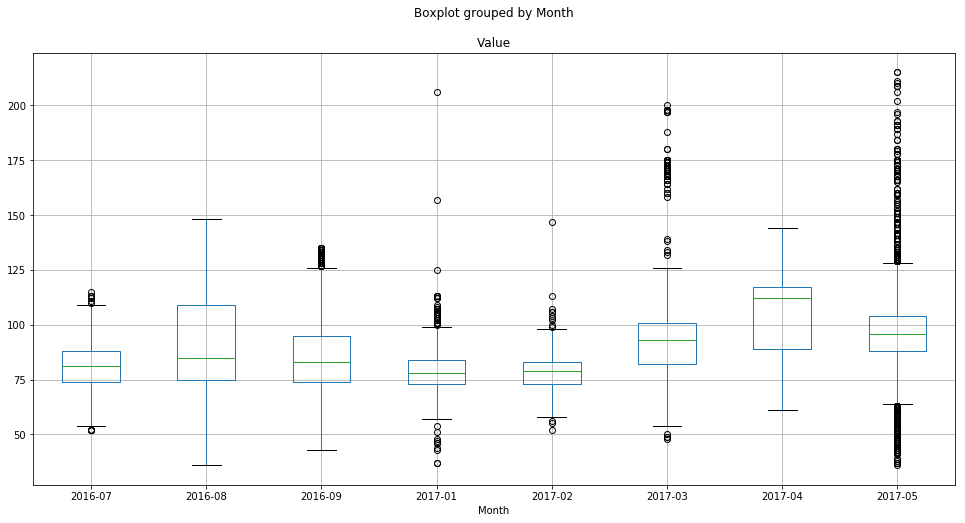

In [48]:
myd.boxplot(by='Month',column="Value", return_type='axes')

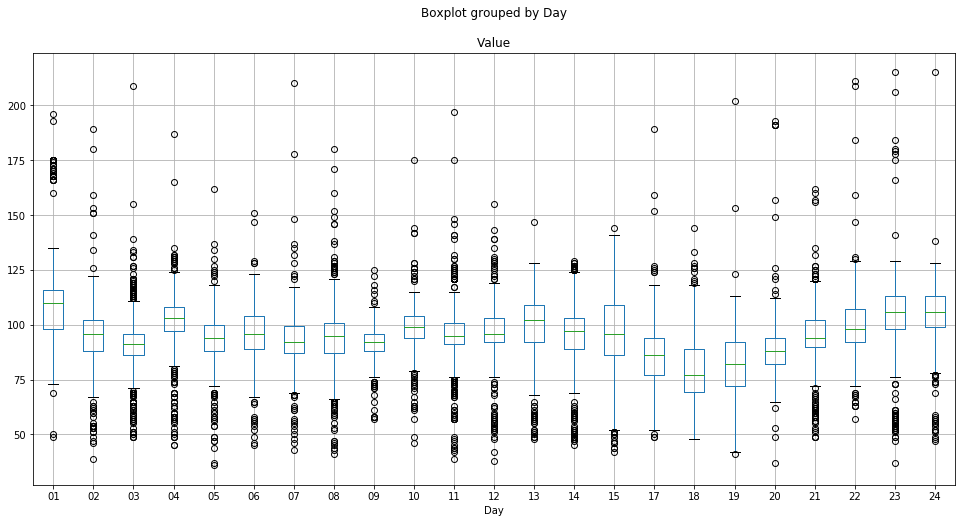

In [46]:
ax = myd[myd['Month']=='2017-05'].boxplot(by='Day',column="Value", return_type='axes')
